# Member Tasks

### M1.1

#### Importing the required libraries

In [68]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from ipywidgets import widgets

In [69]:
# This library is used to render static images so the images from plotly can rendered properly on GitHub
# !pip install -U kaleido      # install library from Jupyter Notebook

#### Read the Drug Overdose data

In [70]:
underlying_death_cause_df = pd.read_csv("../../../../data/stage_2/Underlying Cause of Death-County-2019.txt", sep='\t')

In [71]:
underlying_death_cause_df

,County,County Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,Population,Crude Rate
0,"Autauga County, AL",1001,Drug poisonings (overdose) Unintentional (X40-...,D1,69,1087149,6.3
1,"Autauga County, AL",1001,Drug poisonings (overdose) Suicide (X60-X64),D2,14,1087149,Unreliable
2,"Baldwin County, AL",1003,Drug poisonings (overdose) Unintentional (X40-...,D1,424,3758097,11.3
3,"Baldwin County, AL",1003,Drug poisonings (overdose) Suicide (X60-X64),D2,71,3758097,1.9
4,"Baldwin County, AL",1003,Drug poisonings (overdose) Undetermined (Y10-Y14),D4,19,3758097,Unreliable
...,...,...,...,...,...,...,...
5536,"Sweetwater County, WY",56037,Drug poisonings (overdose) Suicide (X60-X64),D2,15,873221,Unreliable
5537,"Teton County, WY",56039,Drug poisonings (overdose) Unintentional (X40-...,D1,13,440125,Unreliable
5538,"Uinta County, WY",56041,Drug poisonings (overdose) Unintentional (X40-...,D1,51,426347,12
5539,"Uinta County, WY",56041,Drug poisonings (overdose) Undetermined (Y10-Y14),D4,10,426347,Unreliable


- Group and Aggregate the data for each unique county

In [72]:
underlying_death_cause_grouped_df = underlying_death_cause_df.groupby(["County Code"])

In [73]:
underlying_death_cause_agg_df = underlying_death_cause_grouped_df.agg({'County':'first','Deaths':'sum','Population':'first'}).reset_index()

In [74]:
underlying_death_cause_agg_df

,County Code,County,Deaths,Population
0,1001,"Autauga County, AL",83,1087149
1,1003,"Baldwin County, AL",535,3758097
2,1005,"Barbour County, AL",14,574442
3,1007,"Bibb County, AL",56,464942
4,1009,"Blount County, AL",168,1171455
...,...,...,...,...
2525,56033,"Sheridan County, WY",61,598998
2526,56037,"Sweetwater County, WY",123,873221
2527,56039,"Teton County, WY",13,440125
2528,56041,"Uinta County, WY",61,426347


- Normalize the mortality data by population, i.e. number of deaths per 100,000 population.

In [75]:
underlying_death_cause_agg_df['Norm_Deaths'] = np.ceil(underlying_death_cause_agg_df['Deaths']/underlying_death_cause_agg_df['Population']*100000)

In [76]:
underlying_death_cause_agg_df

,County Code,County,Deaths,Population,Norm_Deaths
0,1001,"Autauga County, AL",83,1087149,8.0
1,1003,"Baldwin County, AL",535,3758097,15.0
2,1005,"Barbour County, AL",14,574442,3.0
3,1007,"Bibb County, AL",56,464942,13.0
4,1009,"Blount County, AL",168,1171455,15.0
...,...,...,...,...,...
2525,56033,"Sheridan County, WY",61,598998,11.0
2526,56037,"Sweetwater County, WY",123,873221,15.0
2527,56039,"Teton County, WY",13,440125,3.0
2528,56041,"Uinta County, WY",61,426347,15.0


In [77]:
underlying_death_cause_agg_df['Norm_Deaths'].mean()

12.646640316205534

In [78]:
underlying_death_cause_agg_df[['County','State']] = underlying_death_cause_agg_df['County'].str.split(',',expand=True)

In [79]:
underlying_death_cause_agg_df.head()

,County Code,County,Deaths,Population,Norm_Deaths,State
0,1001,Autauga County,83,1087149,8.0,AL
1,1003,Baldwin County,535,3758097,15.0,AL
2,1005,Barbour County,14,574442,3.0,AL
3,1007,Bibb County,56,464942,13.0,AL
4,1009,Blount County,168,1171455,15.0,AL


In [80]:
underlying_death_cause_agg_df['Norm_Deaths'].median()

11.0

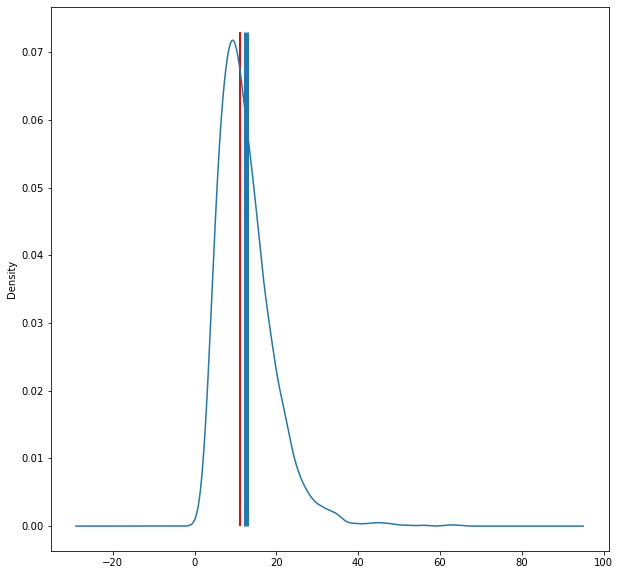

In [81]:
underlying_death_cause_agg_df['Norm_Deaths'].plot(kind="density", figsize=(10,10))

# Plot black line at mean
plt.vlines(underlying_death_cause_agg_df['Norm_Deaths'].mean(), ymin=0, ymax=0.073, linewidth=5.0)

# Plot red line at median
plt.vlines(underlying_death_cause_agg_df['Norm_Deaths'].median(), ymin=0, ymax=0.073, linewidth=2.0, color="red")

In [82]:
underlying_death_cause_agg_df['Norm_Deaths'].mode()

0    9.0
dtype: float64

#### Read/Import the Super Dataframe Created in Stage I

In [83]:
super_df = pd.read_csv("../../../../data/stage_1/Merged_Data.csv")

In [84]:
super_df.head()

,County Code,County,Deaths,Population,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate
0,45001,"Abbeville County, SC",38,535389,8.0,45,1,45001,SC,Abbeville County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC,45001,32.4
1,22001,"Acadia Parish, LA",237,1279727,19.0,22,1,22001,LA,Acadia Parish,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LA,22001,32.2
2,51001,"Accomack County, VA",73,726189,11.0,51,1,51001,VA,Accomack County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VA,51001,19.4
3,16001,"Ada County, ID",988,8083452,13.0,16,1,16001,ID,Ada County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ID,16001,60.8
4,21001,"Adair County, KY",43,387950,12.0,21,1,21001,KY,Adair County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21001,71.3


In [85]:
# Minimum Opioid Mortality
super_df["Norm_Deaths"].min()

2.0

In [86]:
# Maximum Opioid Mortality
super_df["Norm_Deaths"].max()

64.0

##### Histogram of Normalized Deaths variable for entire US as a distribution (Method 1)

<AxesSubplot:>

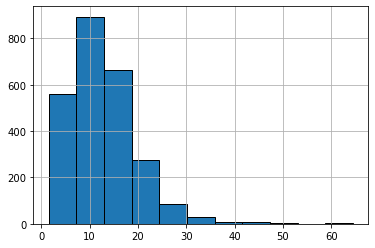

In [87]:
super_df["Norm_Deaths"].hist(range=(1.5,64.5), bins=11, ec='black')

##### Add a vertical line to the histogram representing the mean Normalized Opioid Death for US. (From Method 1)

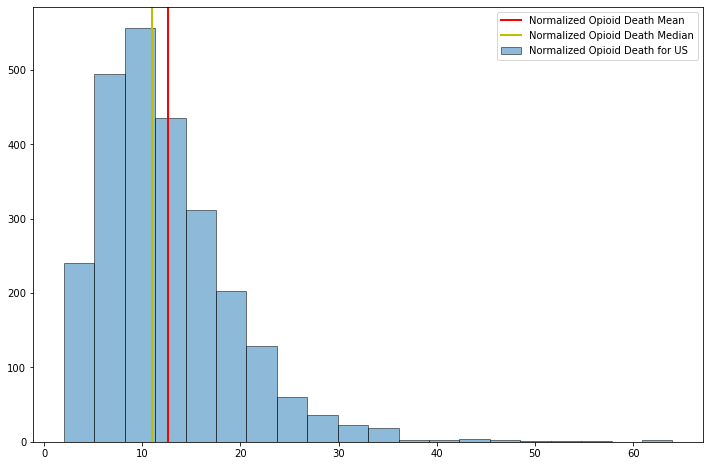

In [88]:
plt.figure(figsize=(12,8))
plt.hist(super_df["Norm_Deaths"], bins=20, edgecolor='k', alpha=0.5, label='Normalized Opioid Death for US')
plt.axvline(super_df["Norm_Deaths"].mean(), color='r', linewidth=2, label='Normalized Opioid Death Mean') 
plt.axvline(super_df["Norm_Deaths"].median(), color='y',  linewidth=2, label='Normalized Opioid Death Median') 
plt.legend(loc='upper right')
plt.show()

##### Histogram of Normalized Deaths variable for entire US as a distribution (Method 2 - Using Plotly)

In [89]:
import plotly.express as px
fig = px.histogram(super_df, x="Norm_Deaths", nbins=40)
fig.show()

##### Add a vertical line to the histogram representing the mean Normalized Opioid Death for US. (From Method 1 - Using Plotly)

In [90]:
import plotly.express as px
fig = px.histogram(super_df, x="Norm_Deaths", nbins=40)
fig.add_vline(x=super_df["Norm_Deaths"].mean(),      # Add line for mean
              line_width=3,
              line_color="red")
fig.add_vline(x=super_df["Norm_Deaths"].median(),    # Add line for median
              line_width=3,
              line_color="yellow")
fig.show()

It can be seen from the plots above that the distribution of the **Normalized Mortality** is **positively skewed**, and the **median** normalized mortality is **less than** the **mean** normalized mortality for the entire US in the year 2019

### M1.2

In [91]:
norm_deaths_labels = ['Very Low (v_low)', 'Low (low)', 'High (high)', 'Very High (v_high)']   # names we want to give to the Normalized deaths groups
norm_deaths_bins = [1.999, 8.0, 11.0, 16.0, 64.0]  # the bins we want to use, 10 years difference
super_df['label'] = pd.cut(super_df.Norm_Deaths, norm_deaths_bins, right=False, labels=norm_deaths_labels)

Below is the codification we used for binning the distribution of the Normalized Death 
- Very Low (v_low) - [1.999 - 8.0)
- Low (low) - [8.0 - 11.0)
- High (high) - [11.0 - 16.0)
- Very High (v_high) - [16.0 - 64.0)

###### Note that the intervals are closed (included) at the left but opened (excluded) at the right

In [92]:
super_df[['Norm_Deaths', 'label']] # Checking the result of the codification/binning for correctness

,Norm_Deaths,label
0,8.0,Low (low)
1,19.0,Very High (v_high)
2,11.0,High (high)
3,13.0,High (high)
4,12.0,High (high)
...,...,...
2522,11.0,High (high)
2523,11.0,High (high)
2524,12.0,High (high)
2525,6.0,Very Low (v_low)


These are the 10 variables we selected in Stage I of the Project:

- Opiod_Dispensing_Rate
- Premature death raw value
- Frequent mental distress raw value
- Poor mental health days raw value
- Poor physical health days raw value
- Insufficient sleep raw value
- Frequent physical distress raw value
- County
- Ratio of population to primary care providers other than physicians.
- Life expectancy raw value

We are going to exclude **County** variable from the Scatter Plots since it is a categorical column

##### Scatter Plot of Normalized Mortality and 9 Indicators (Method 1) => Indicator on x-axis and Normalized Death on y-axis

<AxesSubplot:xlabel='Life expectancy raw value', ylabel='Norm_Deaths'>

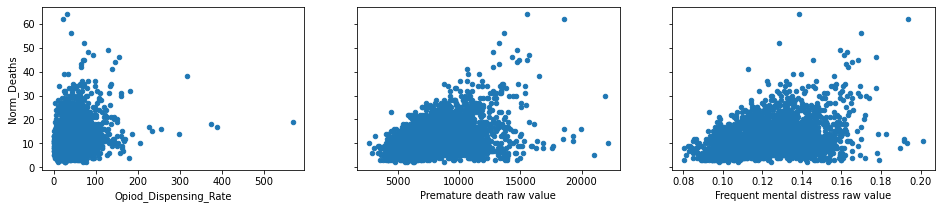

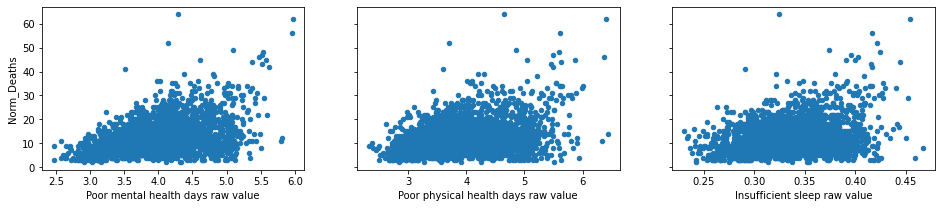

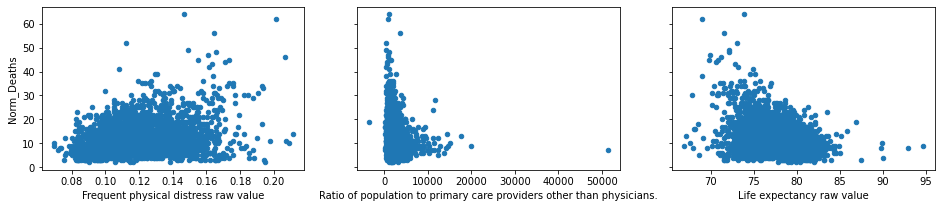

In [93]:
# Relationship between the features and the response
fig, axs = plt.subplots(1, 3, sharey=True)
super_df.plot(kind='scatter', x='Opiod_Dispensing_Rate', y='Norm_Deaths', ax=axs[0], figsize=(16, 3))
super_df.plot(kind='scatter', x='Premature death raw value', y='Norm_Deaths', ax=axs[1])
super_df.plot(kind='scatter', x='Frequent mental distress raw value', y='Norm_Deaths', ax=axs[2])

# Relationship between the features and the response
fig, axs = plt.subplots(1, 3, sharey=True)
super_df.plot(kind='scatter', x='Poor mental health days raw value', y='Norm_Deaths', ax=axs[0], figsize=(16, 3))
super_df.plot(kind='scatter', x='Poor physical health days raw value', y='Norm_Deaths', ax=axs[1])
super_df.plot(kind='scatter', x='Insufficient sleep raw value', y='Norm_Deaths', ax=axs[2])

# Relationship between the features and the response
fig, axs = plt.subplots(1, 3, sharey=True)
super_df.plot(kind='scatter', x='Frequent physical distress raw value', y='Norm_Deaths', ax=axs[0], figsize=(16, 3))
super_df.plot(kind='scatter', x='Ratio of population to primary care providers other than physicians.', y='Norm_Deaths', ax=axs[1])
super_df.plot(kind='scatter', x='Life expectancy raw value', y='Norm_Deaths', ax=axs[2])##### Scatter Plot of Normalized Mortality and 9 Indicators (Method 1) => Normalized Death on x-axis and Indicator on y-axis

##### Scatter Plot of Normalized Mortality and 9 Indicators (Method 1) => Normalized Death on x-axis and Indicator on y-axis

<AxesSubplot:xlabel='Norm_Deaths', ylabel='Life expectancy raw value'>

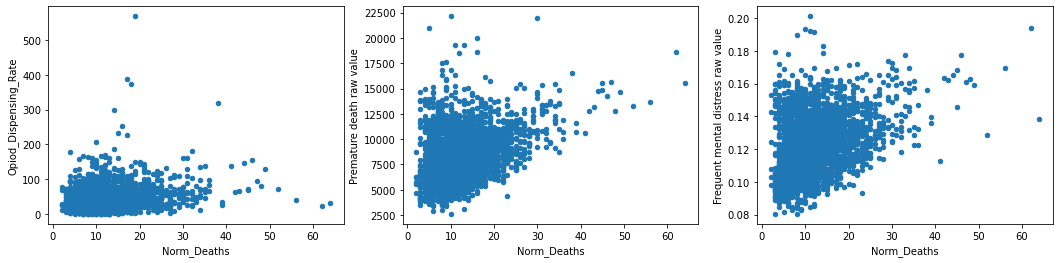

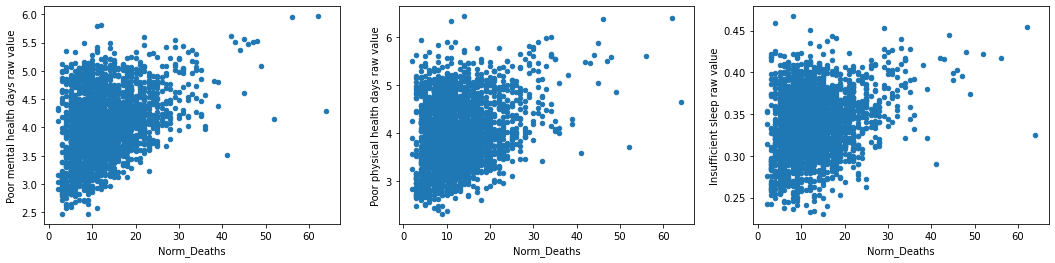

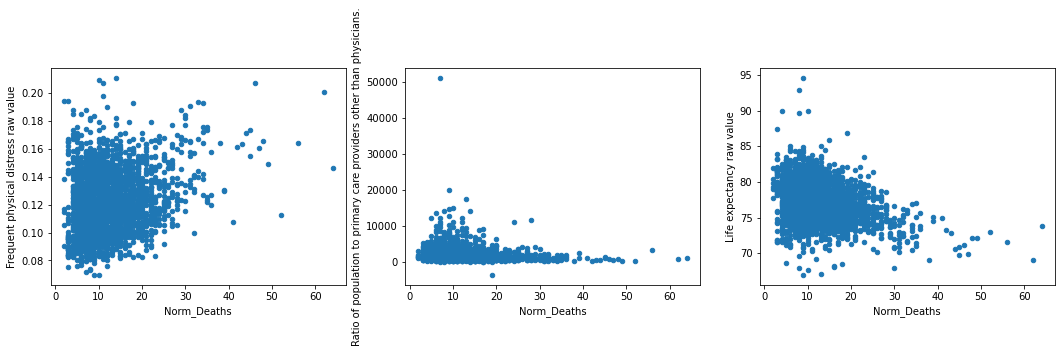

In [94]:
# Relationship between the features and the response
fig, axs = plt.subplots(1, 3, sharex=True)
super_df.plot(kind='scatter', x='Norm_Deaths', y='Opiod_Dispensing_Rate', ax=axs[0], figsize=(18, 4))
super_df.plot(kind='scatter', x='Norm_Deaths', y='Premature death raw value', ax=axs[1])
super_df.plot(kind='scatter', x='Norm_Deaths', y='Frequent mental distress raw value', ax=axs[2])

# Relationship between the features and the response
fig, axs = plt.subplots(1, 3, sharex=True)
super_df.plot(kind='scatter', x='Norm_Deaths', y='Poor mental health days raw value', ax=axs[0], figsize=(18, 4))
super_df.plot(kind='scatter', x='Norm_Deaths', y='Poor physical health days raw value', ax=axs[1])
super_df.plot(kind='scatter', x='Norm_Deaths', y='Insufficient sleep raw value', ax=axs[2])

# Relationship between the features and the response
fig, axs = plt.subplots(1, 3, sharex=True)
super_df.plot(kind='scatter', x='Norm_Deaths', y='Frequent physical distress raw value', ax=axs[0], figsize=(18, 4))
super_df.plot(kind='scatter', x='Norm_Deaths', y='Ratio of population to primary care providers other than physicians.', ax=axs[1])
super_df.plot(kind='scatter', x='Norm_Deaths', y='Life expectancy raw value', ax=axs[2])

##### Scatter Plot of Normalized Mortality and 9 Indicators (Method 2 - Using Plotly) => Normalized Death on x-axis and Indicator on y-axis

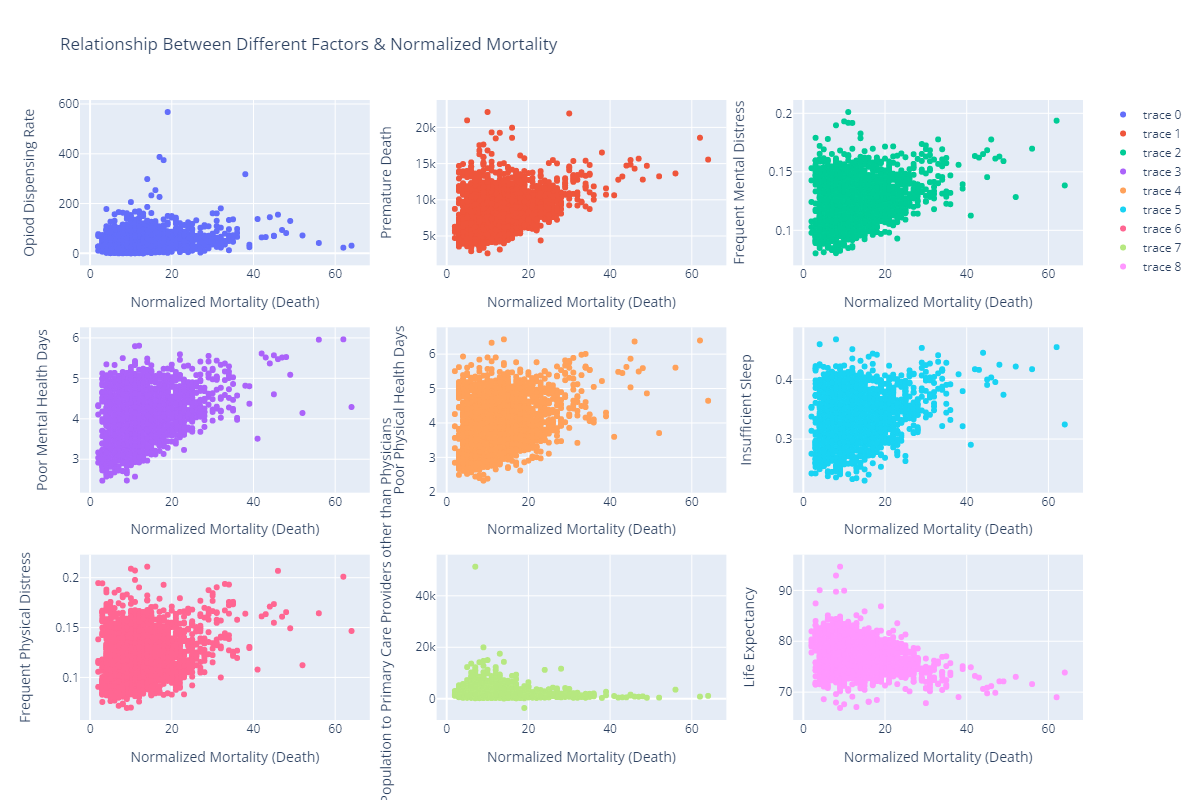

In [95]:
fig = make_subplots(
    rows=3, 
    cols=3
)

# subplot_titles=("Opiod_Dispensing_Rate", "Premature death raw value", "Frequent mental distress raw value",
#                "Poor mental health days raw value", "Poor physical health days raw value", "Insufficient sleep raw value",
#                "Frequent physical distress raw value", "Ratio of population to primary care providers other than physicians.",
#                "Life expectancy raw value")

fig.add_trace(
    go.Scatter(x=super_df["Norm_Deaths"],
               y=super_df["Opiod_Dispensing_Rate"],
               mode="markers+text"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=super_df["Norm_Deaths"],
               y=super_df["Premature death raw value"],
               mode="markers+text"),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=super_df["Norm_Deaths"],
               y=super_df["Frequent mental distress raw value"],
               mode="markers+text"),
    row=1, col=3
)

fig.add_trace(
    go.Scatter(x=super_df["Norm_Deaths"],
               y=super_df["Poor mental health days raw value"],
               mode="markers+text"),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=super_df["Norm_Deaths"],
               y=super_df["Poor physical health days raw value"],
               mode="markers+text"),
    row=2, col=2
)

fig.add_trace(
    go.Scatter(x=super_df["Norm_Deaths"],
               y=super_df["Insufficient sleep raw value"],
               mode="markers+text"),
    row=2, col=3
)

fig.add_trace(
    go.Scatter(x=super_df["Norm_Deaths"],
               y=super_df["Frequent physical distress raw value"],
               mode="markers+text"),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=super_df["Norm_Deaths"],
               y=super_df["Ratio of population to primary care providers other than physicians."],
               mode="markers+text"),
    row=3, col=2
)

fig.add_trace(
    go.Scatter(x=super_df["Norm_Deaths"],
               y=super_df["Life expectancy raw value"],
               mode="markers+text"),
    row=3, col=3
)

# Update yaxis properties
fig.update_yaxes(
    title_text="Opiod Dispensing Rate", row=1, col=1
)
fig.update_yaxes(
    title_text="Premature Death", row=1, col=2
)
fig.update_yaxes(
    title_text="Frequent Mental Distress", row=1, col=3
)

# Update yaxis properties
fig.update_yaxes(
    title_text="Poor Mental Health Days", row=2, col=1
)
fig.update_yaxes(
    title_text="Poor Physical Health Days", row=2, col=2
)
fig.update_yaxes(
    title_text="Insufficient Sleep", row=2, col=3
)

# Update yaxis properties
fig.update_yaxes(
    title_text="Frequent Physical Distress", row=3, col=1
)
fig.update_yaxes(
    title_text="Ratio of Population to Primary Care Providers other than Physicians", row=3, col=2
)
fig.update_yaxes(
    title_text="Life Expectancy", row=3, col=3
)



# Update xaxis properties
fig.update_xaxes(
    title_text="Normalized Mortality (Death)", row=1, col=1
)
fig.update_xaxes(
    title_text="Normalized Mortality (Death)", row=1, col=2
)
fig.update_xaxes(
    title_text="Normalized Mortality (Death)", row=1, col=3
)

# Update xaxis properties
fig.update_xaxes(
    title_text="Normalized Mortality (Death)", row=2, col=1
)
fig.update_xaxes(
    title_text="Normalized Mortality (Death)", row=2, col=2
)
fig.update_xaxes(
    title_text="Normalized Mortality (Death)", row=2, col=3
)

# Update xaxis properties
fig.update_xaxes(
    title_text="Normalized Mortality (Death)", row=3, col=1
)
fig.update_xaxes(
    title_text="Normalized Mortality (Death)", row=3, col=2
)
fig.update_xaxes(
    title_text="Normalized Mortality (Death)", row=3, col=3
)

fig.update_layout(height=800, width=1200, title_text="Relationship Between Different Factors & Normalized Mortality")
fig.show(renderer="png")

##### Trends observed

- 

### Extra Credit

In [185]:
factor_variables = ['Opiod_Dispensing_Rate', 'Premature death raw value', 'Frequent mental distress raw value', 'Poor mental health days raw value', 'Poor physical health days raw value', 'Insufficient sleep raw value', 'Frequent physical distress raw value', 'Ratio of population to primary care providers other than physicians.', 'Life expectancy raw value']

In [186]:
factor = widgets.Dropdown(
    options=factor_variables,
    value='Opiod_Dispensing_Rate',
    description='Indicator:',
)

In [212]:
# Assign an empty figure widget with two traces
trace1 = go.Scatter(x=super_df["Norm_Deaths"],
               y=super_df["Opiod_Dispensing_Rate"],
               mode="markers+text")
g = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        title=dict(
                            text='Relationship Between Normalized Mortality & Different Factors'
                        ),
                        autosize=False,
                        width=600,
                        height=600
                    )
                   )

In [213]:
trace1

Scatter({
    'mode': 'markers+text',
    'x': array([ 8., 19., 11., ..., 12.,  6.,  7.]),
    'y': array([32.4, 32.2, 19.4, ..., 24.6,  3.8,  1.7])
})

In [214]:
def validate():
    if factor.value in factor_variables:
        return True
    else:
        return False

In [215]:
def response(change):
    if validate():

        y1 = super_df[factor.value]

        with g.batch_update():
            g.data[0].y = y1
            g.layout.xaxis.title = "Normalized Mortality (Death)"
            g.layout.yaxis.title = factor.value.replace(" raw value", "")


factor.observe(response, names="value")

In [216]:
container = widgets.HBox([factor])
widgets.VBox([container,
              g])